In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
df = pd.read_excel('SNA.xlsx', sheet_name="SNA")

print(df.head())

   s_a           x  s_b      y  phase      source
0    7  Dinas PUPR    1   BPBD      1  Dinas PUPR
1    1        BPBD    2  Polri      1        BPBD
2    7  Dinas PUPR    9   BWSS      1  Dinas PUPR
3    1        BPBD    2  Polri      2        BPBD
4    1        BPBD    3    TNI      2        BPBD


In [22]:
color_map = plt.cm.viridis

In [23]:
legend_handles = []

In [28]:
unique_phases = df['x'].unique()

Performing analysis for Phase 1


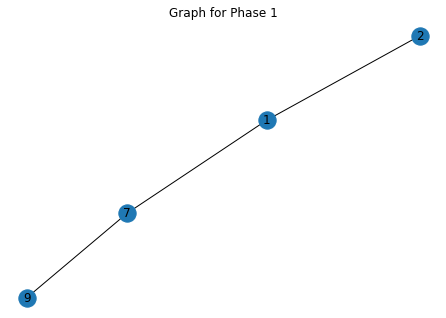

Performing analysis for Phase 2


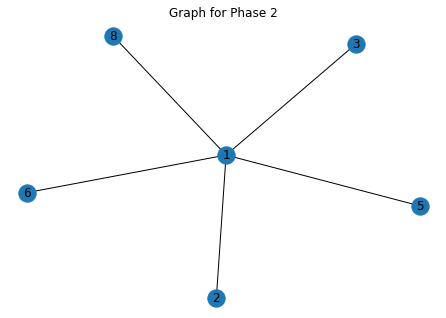

Performing analysis for Phase 3


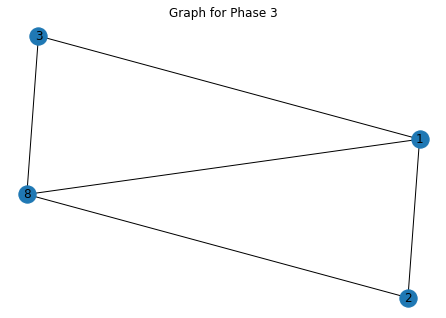

Performing analysis for Phase 4


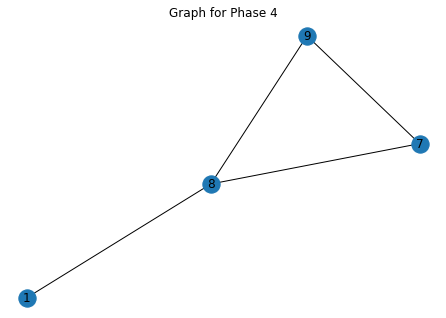

In [29]:
for phase in df['phase'].unique():
    subgraph = df[df['phase'] == phase]
    G = nx.from_pandas_edgelist(subgraph, source='s_a', target='s_b')

    if phase == 1:
        print("Performing analysis for Phase 1")
        # Example: Draw the graph
        nx.draw(G, with_labels=True)
        plt.title("Graph for Phase 1")
        plt.show()

    elif phase == 2:
        print("Performing analysis for Phase 2")
        # Example: Draw the graph
        nx.draw(G, with_labels=True)
        plt.title("Graph for Phase 2")
        plt.show()

    elif phase == 3:
        print("Performing analysis for Phase 3")
        # Example: Draw the graph
        nx.draw(G, with_labels=True)
        plt.title("Graph for Phase 3")
        plt.show()
    elif phase == 4:
        print("Performing analysis for Phase 4")
        # Example: Draw the graph
        nx.draw(G, with_labels=True)
        plt.title("Graph for Phase 4")
        plt.show()
    else:
        print("No specific action defined for Phase", phase)

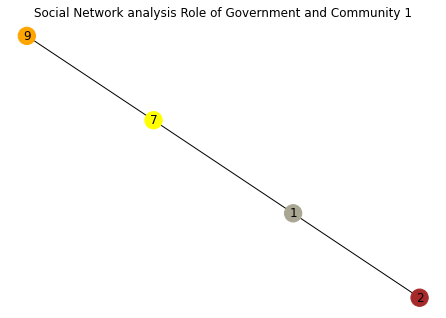

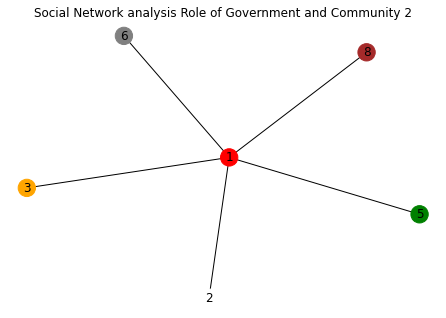

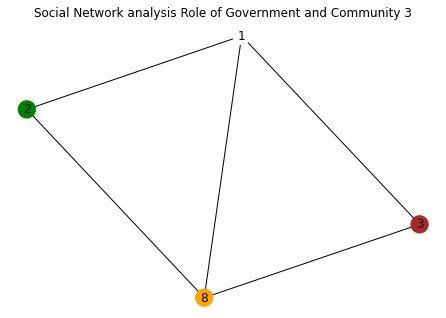

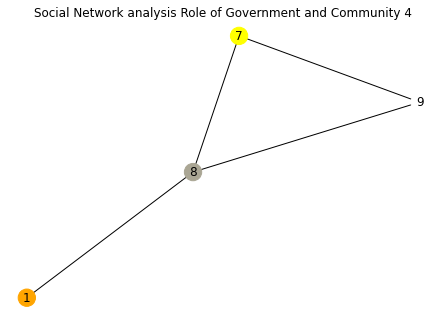

In [30]:
for phase in df['phase'].unique():
    subgraph = df[df['phase'] == phase]
    G = nx.from_pandas_edgelist(subgraph, source='s_a', target='s_b')

    agency_colors = {
        'BPBD': 'orange',
        'Polri': 'brown',
        'TNI': 'green',
        'Dishub': 'blue',
        'Dinas PUPR': 'yellow',
        'Satpol PP': 'gray',
        'Damkar':'red',
        'Masyarakat':'white',
        'BWSS':'#AAA694' 
    }

    node_colors = [agency_colors.get(agency, 'gray') for agency in set(subgraph['x']).union(subgraph['y'])]

    nx.draw(G, with_labels=True, node_color=node_colors)
    plt.title(f"Social Network analysis Role of Government and Community {phase}")
    
        # Save the plot as a PNG file
    plt.savefig(f"social_network_phase_{phase}.png")
    
    plt.show()

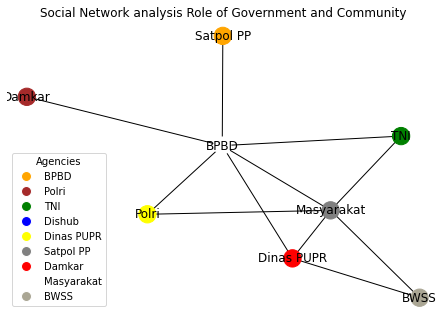

In [39]:
# Combine all data from different phases into a single DataFrame
combined_df = pd.concat([df[df['phase'] == phase] for phase in df['phase'].unique()])

# Create a graph from the combined DataFrame
G = nx.from_pandas_edgelist(combined_df, source='x', target='y')

# Create a list of all unique agencies
all_agencies = set(combined_df['x']).union(combined_df['y'])

# Assign colors to each agency
colors = {
    'Regional Disaster Management': 'orange',
    'Social Departement': 'green',
    'Public Works Departement': 'red',
    'Planning Agencey': 'blue',
    'Private Sector': 'yellow',
    'Local Community': 'gray'
}

# Assign a color to each node based on its agency
node_colors = [agency_colors.get(agency, 'gray') for agency in all_agencies]

# Draw the graph
nx.draw(G, with_labels=True, node_color=node_colors)

# Add legend
patches = [plt.Line2D([0], [0], marker='o', color='w', label=agency, 
                      markerfacecolor=color, markersize=10) for agency, color in agency_colors.items()]
plt.legend(handles=patches, title='Agencies', loc='best')

plt.title("Social Network analysis Role of Government and Community")
plt.show()

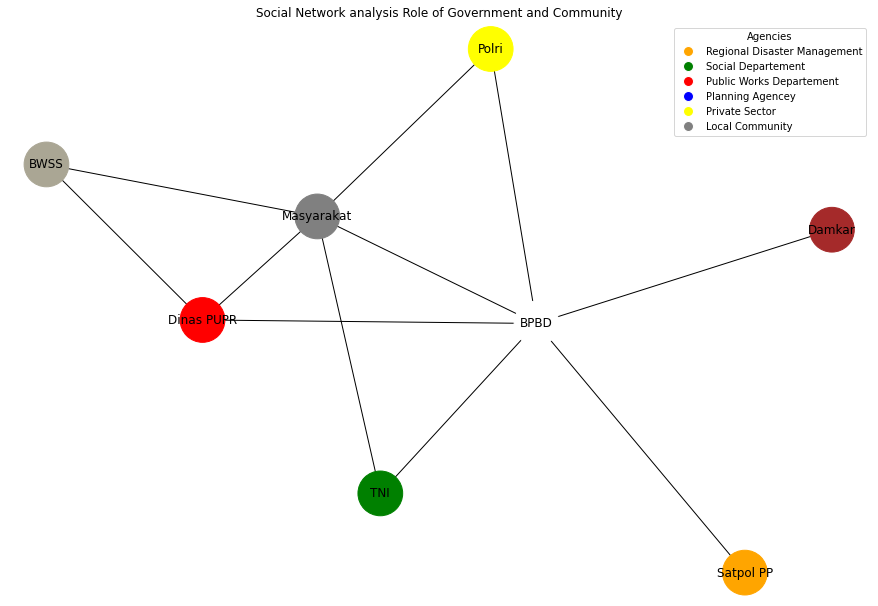

<Figure size 432x288 with 0 Axes>

In [42]:
# Assuming you already have the combined_df, G, all_agencies, colors, and node_colors defined

# Set the figure size
plt.figure(figsize=(12, 8))

# Draw the graph with increased node size
nx.draw(G, with_labels=True, node_color=node_colors, node_size=2000)  # Adjust the node_size as needed

# Add legend
patches = [plt.Line2D([0], [0], marker='o', color='w', label=agency, 
                      markerfacecolor=color, markersize=10) for agency, color in colors.items()]
plt.legend(handles=patches, title='Agencies', loc='best')

plt.title("Social Network analysis Role of Government and Community")
plt.show()
plt.savefig(f"Social_Network_analysis_Role_Government_Community.png")